In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/MyDrive/

In [ ]:
import numpy as np
import os
from prepare_data_sgd import *

## Loading Data

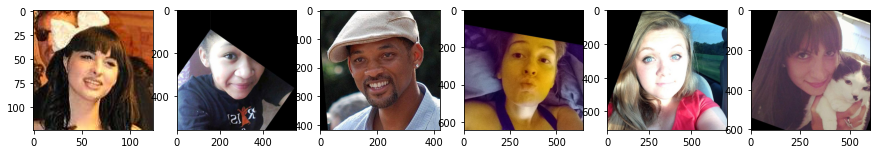

In [ ]:
base_dir = 'DATASET/'

age_train, features_train = prepare_data('train', base_dir)
age_val, features_val = prepare_data('val', base_dir)
_, features_test = prepare_data('test', base_dir)
show_data(base_dir)

In [ ]:
# Closed Form Solution 
def closed_form_solution(age, features):
    # Preprocess
    H = features
    ones = np.ones(len(H))
    H = np.column_stack((ones,H))
    Y = age
    
    # Define parameter weights
    
    weights = np.linalg.inv(H.T @ H) @ (H.T @ Y)
    

    # separate the weights and bias
    bias = weights[0]
    weights = weights[1:]
    
    return weights, bias

### Validate

Your validate loss is: 67.84


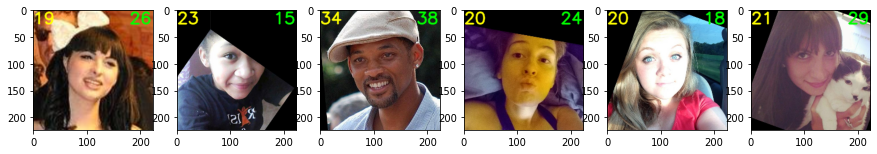

In [ ]:
w, b = closed_form_solution(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
print("Your validate loss is:", round(loss, 3))

### Test and Generate results file

In [ ]:
prediction = test(w, b, features_test, 'cfs.txt')
print("Test results has saved to cfs.txt")
print(prediction[:10])

Test results has saved to cfs.txt
[[28.04639961]
 [60.90374512]
 [55.19594937]
 [23.35683531]
 [35.20122165]
 [34.36335497]
 [36.63257246]
 [44.11504381]
 [18.49147784]
 [57.60077161]]


In [ ]:
# Gradient descent algorithm
def gradient_descent(age, feature):
    assert len(age) == len(feature)

    # Init weights and bias
    weights = np.random.randn(feature.shape[1], 1)
    bias = np.random.randn(1, 1)
    
    # Learning rate
    lr = 10e-3

    N = feature.shape[0]
  
    for e in range(epoch):
        # forward pass
        Prediction = np.dot(feature, weights) + bias
        Trueval = age.reshape(-1, 1)

        # calculate loss
        loss = np.sum((Trueval - Prediction)**2)/N
        

        # calculate gradient 
        weight = -(2/N) * np.dot(feature.T, (Trueval - Prediction))
        g_bias = - (2/N) * np.sum(Trueval-Prediction, axis=0)

        # update weights
        weights = weights - (lr*weight)
        bias = bias - (lr*g_bias)
        
        if momentum:
            pass # You can also consider the gradient descent with momentum

        # Print epoch loss to observe the performance change 
    return weights, bias

### Train and validate

Your validate score is: 60.248


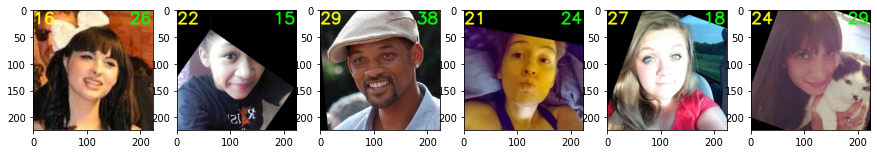

In [ ]:
w, b = gradient_descent(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
print("Your validate score is:", round(loss, 3))

###  Test and Generate results file

In [ ]:
prediction = test(w, b, features_test, 'gd.txt')
print("Test results has saved to gd.txt")
print(prediction[:10])

Test results has saved to gd.txt
[[20.03428526]
 [65.58199024]
 [58.24086766]
 [23.87216448]
 [31.44175786]
 [29.51742193]
 [24.00510603]
 [41.70109482]
 [21.49669249]
 [48.39588422]]


In [ ]:
# Implement Stochastic Gradient descent
def stochastic_gradient_descent(age, feature):
    # check the inputs
    assert len(age) == len(feature)
    
    # Set the random seed
    np.random.seed(0)

    # Init weights and bias
    weights = np.random.randn(feature.shape[1], 1)
    bias = np.random.rand(1, 1)

    # Learning rate
    lr = 10e-5

    # Batch size
    batch_size = 16
 
    # Number of mini-batches
    t = len(age) // batch_size

    N = feature.shape[0]

    for e in range(epoch_sgd):
        # Shuffle training data
        n = np.random.permutation(len(feature))  
        
        for m in range(t):
            # Providing mini batch with fixed batch size of 16
            allfeature = feature[n[m * batch_size : (m+1) * batch_size]]
            allage = age[n[m * batch_size : (m+1) * batch_size]]
            
            
            # forward pass
            prediction = np.dot(allfeature, weights) + bias
            truveval = allage.reshape(-1, 1)

            # calculate loss
            loss = np.sum((truveval - prediction)**2)/N

            # calculate gradient 
            weight = -(2/N) * np.dot(allfeature.T, (truveval - prediction))
            g_bias = - (2/N) * np.sum(truveval-prediction, axis=0)

            # update weights
            weights = weights - (lr*weight)
            bias = bias - (lr*g_bias)
                
            if momentum:
                pass # You can also consider the gradient descent with momentum
        
        # Print epoch loss to observe the performance change 
    return weights, bias

### Train and validate

Your validate score is: 93.29


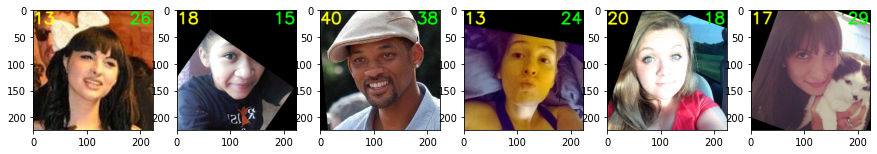

In [ ]:
w, b = stochastic_gradient_descent(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
print("Your validate score is:", round(loss, 3))

### Test and Generate results file

In [ ]:
prediction = test(w, b, features_test, 'sgd.txt')
print("Test results has saved to sgd.txt")
print(prediction[:10])

Test results has saved to sgd.txt
[[27.36089199]
 [74.44590098]
 [50.12114338]
 [21.95665468]
 [34.78194637]
 [31.05241716]
 [33.19124767]
 [42.73966472]
 [20.82481993]
 [53.32193967]]
